# Node Feature Extraction

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
import csv
import pandas as pd
import numpy as np


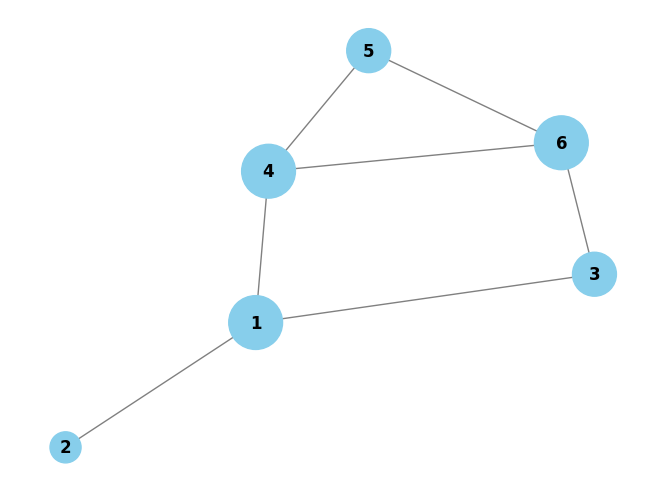

In [33]:
G = nx.Graph()
G.add_edges_from([(1, 2), (1, 3), (1, 4), (3, 6), (4, 5), (4, 6), (5, 6)])

# Get the degree of each node
degree_dict = dict(G.degree())

# Create a list of node sizes based on the degree of each node
node_sizes = [degree * 500 for degree in degree_dict.values()]  # Scale the size by 500 for better visibility

# Draw the graph with node sizes proportional to their degree
nx.draw(G, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=12, font_weight='bold', edge_color='gray')

# Display the graph
plt.show()

In [34]:
# graph_path = 'C:\\Users\\venus\\Desktop\\spreading influence identification\\datasets\\BA_EXP\\ba_edgelist_exp1_8000_4.edges'
# # graph_path = 'C:\\Users\\venus\\Desktop\\spreading influence identification\\datasets\\BA_EXP\\ba_edgelist_exp3_4000_6.edges'
# G = nx.read_edgelist(graph_path, comments="%", nodetype=int)
# len(G.nodes())
# # Get the degree of each node
# degree_dict = dict(G.degree())

# Create a list of node sizes based on the degree of each node
# node_sizes = [degree * 500 for degree in degree_dict.values()]  # Scale the size by 500 for better visibility


## WiD1

In [35]:
csv_filename = 'file_with_WiD1.csv'

sorted_nodes = sorted(degree_dict.items())
# Write the data to the CSV file
with open(csv_filename, mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header
    writer.writerow(['Node', 'WiD1'])
    
    # Write the node and degree data
    for node, degree in sorted_nodes:
        writer.writerow([node, degree])
df = pd.read_csv(csv_filename)
# df.style.hide(axis='index')



## WiD2

In [36]:
df = pd.read_csv(csv_filename)
def compute_WiD2(row):
    node = row['Node']
    neighbors = list(G.neighbors(node))
    
    # Sum the WiD1 value of the node and its neighbors
    total_WiD1 = row['WiD1'] + sum(df[df['Node'].isin(neighbors)]['WiD1'])
    return total_WiD1

# Apply the function to create the WiD2 column
df['WiD2'] = df.apply(compute_WiD2, axis=1)
# Save the updated DataFrame to a new CSV if needed
csv_filename = 'updated_file_with_WiD2.csv'
df.to_csv(csv_filename, index=False)

# df.style.hide(axis='index')


## WiD3

In [37]:
df = pd.read_csv(csv_filename)
def compute_WiD3(row):
    node = row['Node']
    neighbors = list(G.neighbors(node))
    
    # Sum the WiD2 value of the node and its neighbors
    sum_WiD2 = row['WiD2'] + sum(df[df['Node'].isin(neighbors)]['WiD2'])
    return sum_WiD2

# Apply the function to create the WiD2 column
df['WiD3'] = df.apply(compute_WiD3, axis=1)

# Save the updated DataFrame to a new CSV if needed
csv_filename = 'updated_file_with_WiD3.csv'
df.to_csv(csv_filename, index=False)
df.style.hide(axis='index')


Node,WiD1,WiD2,WiD3
1,3,9,32
2,1,4,13
3,2,8,27
4,3,11,38
5,2,8,29
6,3,10,37


Node,WiD1,WiD2,WiD3
1,3,9,32
2,1,4,13
3,2,8,27
4,3,11,38
5,2,8,29
6,3,10,37


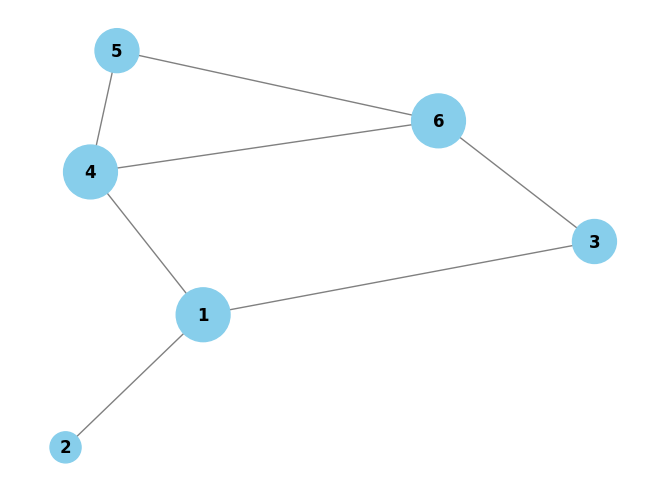

In [38]:

nx.draw(G, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=12, font_weight='bold', edge_color='gray')

df.style.hide(axis='index')

# WiH1

In [39]:

def calculate_WiH1(G, df):
    # Convert the 'Node' column to index for quick lookups
    df.set_index('Node', inplace=True)
    WiH1_values = []
    # Iterate over each node in the DataFrame
    for node in df.index:
        # Get neighbors of the node
        neighbors = G.neighbors(node)

        # Build SHi: collect the WiD1 values of all neighbors
        SHi = [df.at[neighbor, 'WiD1'] for neighbor in neighbors if neighbor in df.index]

        # Sort SHi in descending order for easier processing
        SHi_sorted = sorted(SHi, reverse=True)

        # Determine the largest h such that there are at least h elements >= h
        h = 0
        for i, value in enumerate(SHi_sorted):
            if value >= (i + 1):  # i+1 because list is 0-indexed
                h = i + 1
            else:
                break

        # Store WiH1 for the node
        WiH1_values.append(h)

    # Add WiH1 to the DataFrame
    df['WiH1'] = WiH1_values

    # Reset index if needed
    df.reset_index(inplace=True)
    return df

df = calculate_WiH1(G, df)
csv_filename = 'updated_file_with_WiH1.csv'
df.to_csv(csv_filename, index=False)
df.style.hide(axis=0)

Node,WiD1,WiD2,WiD3,WiH1
1,3,9,32,2
2,1,4,13,1
3,2,8,27,2
4,3,11,38,2
5,2,8,29,2
6,3,10,37,2


Node,WiD1,WiD2,WiD3,WiH1,WiH2
1,3,9,32,2,7
2,1,4,13,1,3
3,2,8,27,2,6
4,3,11,38,2,8
5,2,8,29,2,6
6,3,10,37,2,8


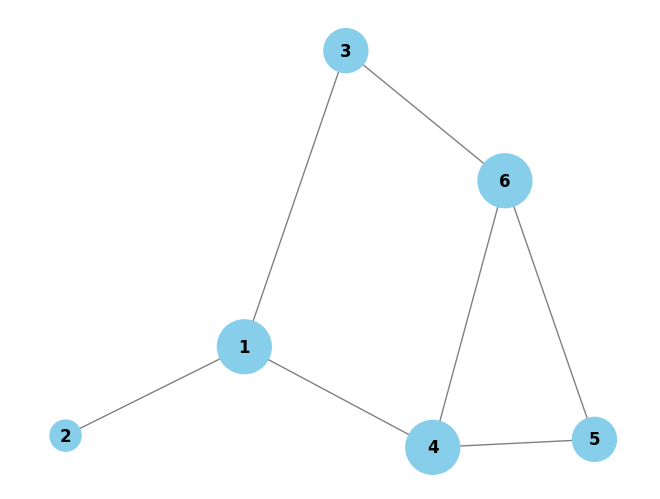

In [40]:
df = pd.read_csv(csv_filename)
def compute_WiH2(row):
    node = row['Node']
    neighbors = list(G.neighbors(node))
    
    # Sum the WiD2 value of the node and its neighbors
    sum_WiH1 = row['WiH1'] + sum(df[df['Node'].isin(neighbors)]['WiH1'])
    return sum_WiH1

# Apply the function to create the WiD2 column
df['WiH2'] = df.apply(compute_WiH2, axis=1)

# Save the updated DataFrame to a new CSV if needed
csv_filename = 'updated_file_with_WiH2.csv'
df.to_csv(csv_filename, index=False)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=12, font_weight='bold', edge_color='gray')
df.style.hide(axis='index')


Node,WiD1,WiD2,WiD3,WiH1,WiH2
1,3,9,32,2,7
2,1,4,13,1,3
3,2,8,27,2,6
4,3,11,38,2,8
5,2,8,29,2,6
6,3,10,37,2,8


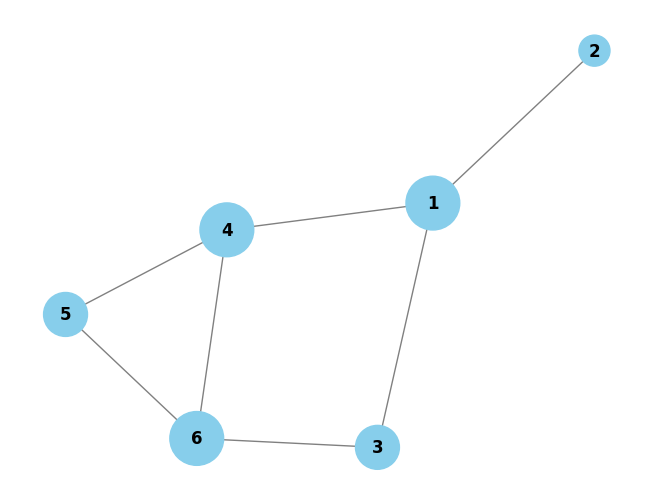

In [41]:
df = pd.read_csv(csv_filename)
def compute_WiH2(row):
    node = row['Node']
    neighbors = list(G.neighbors(node))
    
    # Sum the WiD2 value of the node and its neighbors
    sum_WiH1 = row['WiH1'] + sum(df[df['Node'].isin(neighbors)]['WiH1'])
    return sum_WiH1

# Apply the function to create the WiD2 column
df['WiH2'] = df.apply(compute_WiH2, axis=1)

# Save the updated DataFrame to a new CSV if needed
csv_filename = 'updated_file_with_WiH2.csv'
df.to_csv(csv_filename, index=False)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=12, font_weight='bold', edge_color='gray')
df.style.hide(axis='index')


Node,WiD1,WiD2,WiD3,WiH1,WiH2,WiH3
1,3,9,32,2,7,24
2,1,4,13,1,3,10
3,2,8,27,2,6,21
4,3,11,38,2,8,29
5,2,8,29,2,6,22
6,3,10,37,2,8,28


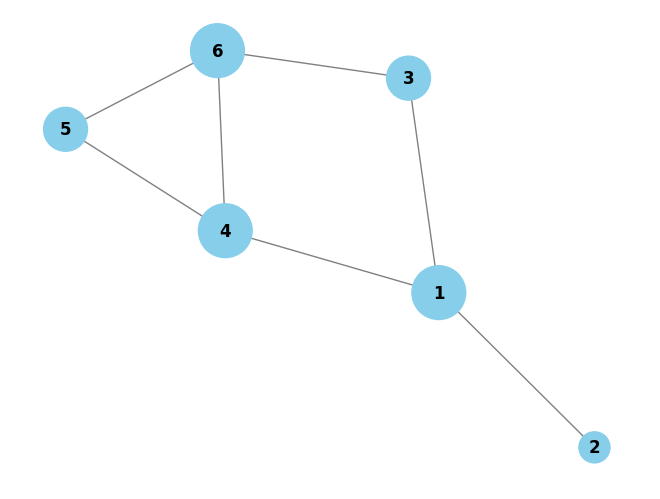

In [42]:
df = pd.read_csv(csv_filename)
def compute_WiH3(row):
    node = row['Node']
    neighbors = list(G.neighbors(node))
    
    # Sum the WiH2 value of the node and its neighbors
    sum_WiH2 = row['WiH2'] + sum(df[df['Node'].isin(neighbors)]['WiH2'])
    return sum_WiH2

# Apply the function to create the WiD2 column
df['WiH3'] = df.apply(compute_WiH3, axis=1)

# Save the updated DataFrame to a new CSV if needed
csv_filename = 'updated_file_with_WiH3.csv'
df.to_csv(csv_filename, index=False)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=node_sizes, font_size=12, font_weight='bold', edge_color='gray')
df.style.hide(axis='index')


## Will use L = 9 for now

In [43]:
def get_sorted_neighbors(df, G, WiXt):
    neighbors = list(G.neighbors(node))
    
    # Ensure the DataFrame is indexed by 'Node' to make lookups easier
    df.set_index('Node', inplace=True)
    
    # Sort neighbors by their WiD3 values
    sorted_neighbors = sorted(neighbors, key=lambda x: df.at[x, WiXt], reverse=True)
    sorted_neighbors.insert(0, node) #insert node at position zero of the list 
    return sorted_neighbors

def adjancency_mat(G, node, graph_feature_path, L= 9):
    neighbors = list(G.neighbors(node))

    df = pd.read_csv(graph_feature_path)
    
    # Ensure the DataFrame is indexed by 'Node' to make lookups easier
    df.set_index('Node', inplace=True)
    
    # Sort neighbors by their WiD3 values
    sorted_neighbors = get_sorted_neighbors(df, G, 'WiD3' )


    print(sorted_neighbors)
    ad_matrix = np.zeros((L, L))
    # Fill the adjacency matrix based on connections in G
    for i, node_i in enumerate(sorted_neighbors[:L]):
        for j, node_j in enumerate(sorted_neighbors[:L]):
            if G.has_edge(node_i, node_j):  # Check if there's an edge between node_i and node_j
                ad_matrix[i, j] = 1  # Set 1 if there is an edge

    return ad_matrix


print("E1:")
print(adjancency_mat(G, 1, csv_filename, 4))
print()

print("E2:")
print(adjancency_mat(G, 2, csv_filename, 4))
print()

print("E3:")
print(adjancency_mat(G, 3, csv_filename, 4))
print()

print("E4:")
print(adjancency_mat(G, 4, csv_filename, 4))
print()

print("E5:")
print(adjancency_mat(G, 5, csv_filename, 4))
print()

print("E6:")
print(adjancency_mat(G, 6, csv_filename, 4))
print()




E1:


KeyError: "None of ['Node'] are in the columns"

In [ ]:
def channel_set(L, adj_matrix, sorted_neighbors, df, WiXt,  node):  #wiDt= 'WiD1'
    deg_chanl_set = np.zeros((L , L)) 
    print(deg_chanl_set)
    this_node = sorted_neighbors[0]
    for l in range(L): 
        for k in range(L): 
            if l == k: 
                deg_chanl_set[l, k] = df.at[node, WiXt]  # WiXt+ alk(which is always 0)
            elif k != 0 and L == 0: 
                k_node = sorted_neighbors[k]
                deg_chanl_set[0, k] = adj_matrix[0, k] * df.at[k_node, WiXt] 
            elif l != 0 and k == 0: 
                l_node = sorted_neighbors[l]
                deg_chanl_set[l, 0] = adj_matrix[l, 0] * df.at[l_node, WiXt] 
            else: 
                deg_chanl_set[l, k] = adj_matrix[l, k] 
    return deg_chanl_set

L = 4
ad_mat = adjancency_mat(G, 6, csv_filename, 4)
node = 6
print("-------")
channel_set(L, ad_mat, so)

[6, 4, 5, 3]
-------


TypeError: channel_set() missing 1 required positional argument: 'node'